# Reducing deep learning model size with Tensorflow Model Optimization Toolkit without effecting it's performane and accuracy

I wrote a article on pruning please visit it : 

https://janibasha695.medium.com/reducing-deep-learning-model-size-without-effecting-its-original-performance-and-accuracy-with-a809b49cf519?sk=daa1f2aae404474ee0a2ae542cbf1552

###Table Of Contents: 
(i) Problem Statement

(ii) Motivation 

(iii) Data Processsing 

(iv) Data Augmentation

(v) Building CNN model without pruning 

(vi)Building CNN model with pruning

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Problem Statement : 
We have images of Cotton Plants, Our aim is to Detect is given cotton plant diseases plant or not


# Motivation : 
Coming from a farmer family background I know the problems of farmers, they don't know the complex diseases of crops. What if we train all diseases of crops and we deploy the model in production, with the help of drones we can detect the disease. As a machine learning, enthusiast and responsible farmer son I want to use my knowledge to contribute farmers from that thought this project started.

# Data Processing

I am using Google Colab for this project.
I uploaded my train,validation and test data sets to Google drive

In [ ]:
from glob import glob

In [ ]:
data= glob('/content/drive/My Drive/Cotton_disease/*')

In [ ]:
data

['/content/drive/My Drive/Cotton_disease/test_',
 '/content/drive/My Drive/Cotton_disease/train_',
 '/content/drive/My Drive/Cotton_disease/val_',
 '/content/drive/My Drive/Cotton_disease/variables',
 '/content/drive/My Drive/Cotton_disease/assets',
 '/content/drive/My Drive/Cotton_disease/saved_model.pb']

We have three folders train_,val_ and test_  

In [ ]:
train_classes=glob('/content/drive/My Drive/Cotton_disease/train_/train/*')

In [ ]:
train_classes

['/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton plant',
 '/content/drive/My Drive/Cotton_disease/train_/train/diseased cotton leaf',
 '/content/drive/My Drive/Cotton_disease/train_/train/fresh cotton leaf']

In train_ folder we have 4 classes 
(i) diseased cotton plant
(ii) fresh cotton plant
(iii) diseased cotton leaf 
(iv) fresh cotton leaf

In [ ]:
test_classes=glob('/content/drive/My Drive/Cotton_disease/test_/test/*')

In [ ]:
test_classes

['/content/drive/My Drive/Cotton_disease/test_/test/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/test_/test/fresh cotton plant',
 '/content/drive/My Drive/Cotton_disease/test_/test/fresh cotton leaf',
 '/content/drive/My Drive/Cotton_disease/test_/test/diseased cotton leaf']

In test_ folder we have 4 classes (i) diseased cotton plant (ii) fresh cotton plant (iii) diseased cotton leaf (iv) fresh cotton leaf

In [ ]:
val_classes=glob('/content/drive/My Drive/Cotton_disease/val_/val/*')

In [ ]:
val_classes

['/content/drive/My Drive/Cotton_disease/val_/val/fresh cotton plant',
 '/content/drive/My Drive/Cotton_disease/val_/val/diseased cotton plant',
 '/content/drive/My Drive/Cotton_disease/val_/val/diseased cotton leaf',
 '/content/drive/My Drive/Cotton_disease/val_/val/fresh cotton leaf']

In val_ folder we have 4 classes (i) diseased cotton plant (ii) fresh cotton plant (iii) diseased cotton leaf (iv) fresh cotton leaf

So our problem statement belong to muliclass classification problem

# Data Augmentation

In train_ ,val_ and  test_ folders, we have 4 classes.
we don't know which type of image we get from users so we need to train our class images such a way that our model must detect it. For that, we augment our train_ class images using ImageDataGenerator.

In [ ]:
# function for plotting agumented class images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

We need to apply rotation, rescaling ,widht_shift,height_shift,shear_range,zoom_range,horizontal_flip on training class images because it helps our  model to detect any type of user input image

In [ ]:
# Dataagumentation on training dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_agument = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 

We apply rescale only on test class images

In [ ]:
# Scaling validation dataset
val_agument = ImageDataGenerator(rescale = 1./255)

The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data

In [ ]:
# training agumented dataset
train_agumented_set = train_agument.flow_from_directory('/content/drive/My Drive/Cotton_disease/train_/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


We apply all agumentations on training class images so we get more images compare to test class images

In [ ]:
# Validation dataset
val_agumented_set= val_agument.flow_from_directory('/content/drive/My Drive/Cotton_disease/val_/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
# classes
train_agumented_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
#scaled RGB values
train_agumented_set[0][0][0]

array([[[0.38592303, 0.7799617 , 0.07289092],
        [0.37437713, 0.7776878 , 0.06844626],
        [0.3938449 , 0.7954242 , 0.09641609],
        ...,
        [0.23949204, 0.32101595, 0.2081195 ],
        [0.23365068, 0.3302335 , 0.19734779],
        [0.22780934, 0.3331542 , 0.17398237]],

       [[0.3697334 , 0.7715226 , 0.04538263],
        [0.36408135, 0.7712656 , 0.04635432],
        [0.38176858, 0.7767539 , 0.08070626],
        ...,
        [0.2358828 , 0.32823443, 0.20451026],
        [0.23004146, 0.33203813, 0.18291089],
        [0.23232733, 0.37559497, 0.13678922]],

       [[0.35447645, 0.76508975, 0.04350091],
        [0.3515186 , 0.758513  , 0.0410152 ],
        [0.3569957 , 0.7491526 , 0.05676146],
        ...,
        [0.23227358, 0.33092204, 0.1918394 ],
        [0.22897914, 0.3465773 , 0.16134262],
        [0.23774117, 0.42251495, 0.0970877 ]],

       ...,

       [[0.489655  , 0.8486822 , 0.21906674],
        [0.4899659 , 0.85390174, 0.21076448],
        [0.50010526, 0

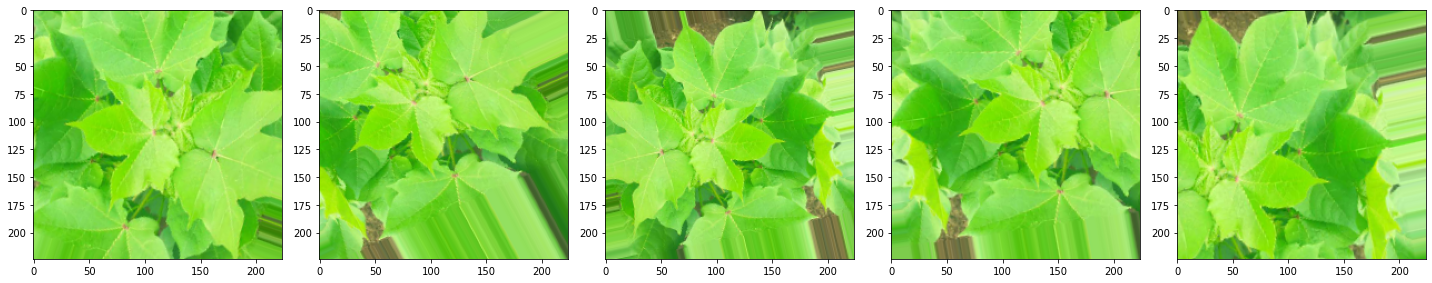

In [ ]:
# plotting the train class augmented images
import matplotlib.pyplot as plt


images = [train_agumented_set[0][0][0] for i in range(5)]
plotImages(images)


# Building CNN from Scratch

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
import numpy as np
from tensorflow.keras.preprocessing import image
from keras.optimizers import Adam
import os
import tempfile
%load_ext tensorboard
import tensorboard
import zipfile

 

In [ ]:
! pip install tensorflow-model-optimization

     |████████████████████████████████| 174kB 4.5MB/s 


# Building CNN model without pruning

In [ ]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[224, 224, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 

In [ ]:
# model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [ ]:
# Callbacks

callbacks = [tf.keras.callbacks.TensorBoard(log_dir=logdir, profile_batch=0)]

In [ ]:
# Compiling the model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
 

In [ ]:
# Fitting the model
history = cnn_model.fit(train_agumented_set, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= val_agumented_set,callbacks=callbacks
                          ) # time start 12.:56

Epoch 1/10
61/61 [==============================] - 568s 9s/step - loss: 1.2274 - accuracy: 0.4459 - val_loss: 1.1069 - val_accuracy: 0.5247
Epoch 2/10
61/61 [==============================] - 39s 634ms/step - loss: 1.0657 - accuracy: 0.5228 - val_loss: 0.9950 - val_accuracy: 0.5185
Epoch 3/10
61/61 [==============================] - 39s 637ms/step - loss: 0.9422 - accuracy: 0.6228 - val_loss: 0.8505 - val_accuracy: 0.6451
Epoch 4/10
61/61 [==============================] - 39s 637ms/step - loss: 0.8620 - accuracy: 0.6581 - val_loss: 0.8554 - val_accuracy: 0.6173
Epoch 5/10
61/61 [==============================] - 38s 631ms/step - loss: 0.8990 - accuracy: 0.6499 - val_loss: 0.8212 - val_accuracy: 0.6636
Epoch 6/10
61/61 [==============================] - 38s 621ms/step - loss: 0.8000 - accuracy: 0.6663 - val_loss: 0.7186 - val_accuracy: 0.7130
Epoch 7/10
61/61 [==============================] - 38s 618ms/step - loss: 0.7624 - accuracy: 0.6981 - val_loss: 0.6673 - val_accuracy: 0.7500
E

In [ ]:
# trained model evalution on validation data set

score = cnn_model.evaluate(val_agumented_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5599062442779541
Test accuracy: 0.7746913433074951


# Epoch vs Loss

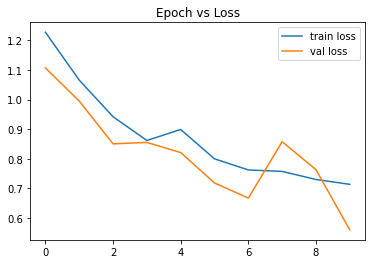

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Epoch vs Loss")
plt.show()
plt.savefig('LossVal_loss')

# Epoch vs Accuracy

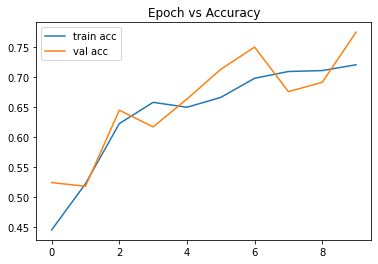

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Epoch vs Accuracy")
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Saving the trained model

cnn_model.save('without_pruning_model.h5')

In [ ]:
# Finding the size of saved model

ls -altr /content/without_pruning_model.h5

-rw-r--r-- 1 root root 61766928 Oct 23 16:10 /content/without_pruning_model.h5


# Building CNN model with pruning

In [ ]:
# importing necessary module from tensorflow model optimization toolkit


from tensorflow_model_optimization.sparsity import keras as sparsity

In [ ]:
import numpy as np

For pruning I am using PolynomialDecay function from Tensorflow Model Optimization API


A PruningSchedule object that controls pruning rate throughout training.

initial_sparsity:Sparsity (%) at which pruning begins.

final_sparsitySparsity (%) at which pruning ends.

begin_stepStep at which to begin pruning.

end_stepStep at which to end pruning.

powerExponent to be used in the sparsity function.

frequencyOnly apply pruning every frequency steps.


In [ ]:
pruning_params = {
      'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.85,
                                                   final_sparsity=0.95,
                                                   begin_step=2000,
                                                   end_step=5000,frequency=100)}

sparsity.prune.low_magnitude : warper layer with pruning functionality which sparsifies the layer’s weights during training. For example, using this with 85% sparsity will ensure that 85% of the layer’s weights are zero.

In [ ]:
# building CNN with pruning 
pruned_model = keras.models.Sequential([
                                    sparsity.prune_low_magnitude(keras.layers.Conv2D(filters=32, kernel_size=3), input_shape=[224, 224, 3],**pruning_params),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    sparsity.prune_low_magnitude (keras.layers.Conv2D(filters=64, kernel_size=3),**pruning_params),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    sparsity.prune_low_magnitude (keras.layers.Conv2D(filters=128, kernel_size=3),**pruning_params),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    sparsity.prune_low_magnitude(keras.layers.Conv2D(filters=256, kernel_size=3),**pruning_params),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    sparsity.prune_low_magnitude  (keras.layers.Dense(units=128, activation='relu'),**pruning_params), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    sparsity.prune_low_magnitude (keras.layers.Dense(units=256, activation='relu'),**pruning_params),                                   
                                    keras.layers.Dropout(0.25),                                    
                                    sparsity.prune_low_magnitude(keras.layers.Dense(units=4, activation='softmax'),**pruning_params) # output layer
])
 

Instructions for updating:
Please use `layer.add_weight` method instead.


In [ ]:
# Pruned model summary

pruned_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d_4 (None, 222, 222, 32)      1762      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
prune_low_magnitude_conv2d_5 (None, 109, 109, 64)      36930     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
prune_low_magnitude_conv2d_6 (None, 52, 52, 128)       147586    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
prune_low_magnitude_conv2d_7 (None, 24, 24, 256)      

In [ ]:

# Compiling model 
pruned_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add a pruning step callback to peg the pruning step to the optimizer's
# step. Also add a callback to add pruning summaries to tensorboard
callbacks = [
    sparsity.UpdatePruningStep(),
    sparsity.PruningSummaries(log_dir=logdir, profile_batch=0)
]


# Fitting the model
history_prun=pruned_model.fit(train_agumented_set, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= val_agumented_set,callbacks=callbacks
                          ) 



#Evaluting trained model on validation data set
score = pruned_model.evaluate(val_agumented_set, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
61/61 [==============================] - 38s 623ms/step - loss: 1.2112 - accuracy: 0.4577 - val_loss: 1.0983 - val_accuracy: 0.4352
Epoch 2/10
61/61 [==============================] - 37s 609ms/step - loss: 1.0489 - accuracy: 0.5515 - val_loss: 0.9275 - val_accuracy: 0.5648
Epoch 3/10
61/61 [==============================] - 37s 615ms/step - loss: 0.9352 - accuracy: 0.6238 - val_loss: 0.8084 - val_accuracy: 0.6481
Epoch 4/10
61/61 [==============================] - 36s 594ms/step - loss: 0.8613 - accuracy: 0.6597 - val_loss: 0.7992 - val_accuracy: 0.6944
Epoch 5/10
61/61 [==============================] - 36s 594ms/step - loss: 0.8441 - accuracy: 0.6689 - val_loss: 0.7695 - val_accuracy: 0.6914
Epoch 6/10
61/61 [==============================] - 36s 589ms/step - loss: 0.7958 - accuracy: 0.6750 - val_loss: 0.7957 - val_accuracy: 0.6790
Epoch 7/10
61/61 [==============================] - 36s 587ms/step - loss: 0.8003 - accuracy: 0.6853 - val_loss: 0.7739 - val_accuracy: 0.6636

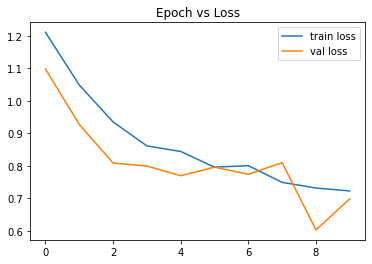

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history_prun.history['loss'], label='train loss')
plt.plot(history_prun.history['val_loss'], label='val loss')
plt.legend()
plt.title("Epoch vs Loss")
plt.show()
plt.savefig('LossVal_loss')

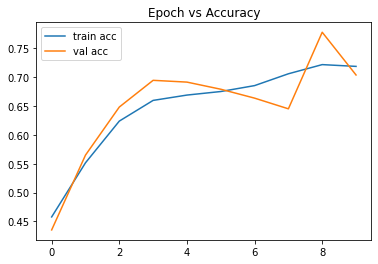

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history_prun.history['accuracy'], label='train acc')
plt.plot(history_prun.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Epoch vs Accuracy")
plt.show()
plt.savefig('AccVal_acc')

sparsity.strip_pruning : Once a model has been pruned to required sparsity, this method can be used to restore the original model with the sparse weights.

In [ ]:
# restoring oriignal model
final_model = sparsity.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 256)      

In [ ]:
# Saving pruned model 

final_model.save('pruned_model.h5')

In [ ]:
# Finding size of pruned model

ls -alrt /content/pruned_model.h5

-rw-r--r-- 1 root root 20603856 Oct 23 16:19 /content/pruned_model.h5
